In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd

In [13]:
!curl https://data.cityofnewyork.us/api/views/8vgb-zm6e/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

    #Data regarding Revised_Notice_of_Property_Value__RNOPV_

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M    0 10.9M    0     0  3525k      0 --:--:--  0:00:03 --:--:-- 3526k


In [17]:
create the env variable if missing

os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIdata"))

PUIdata /nfshome/mv1742/PUIDATA


In [18]:
# move the data
!mv dhsdaily.csv $PUIDATA

mv: 'dhsdaily.csv' and '/nfshome/mv1742/PUIDATA/dhsdaily.csv' are the same file


In [19]:
!ls $PUIDATA

Assignment2_ExtraCredit.ipynb  Assignment2.ipynb  dhsdaily.csv


In [20]:
dhs = pd.read_csv("%s/dhsdaily.csv"%os.getenv("PUIDATA"))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
#print the fist 8 lines out
dhs.head(7)

,MAILED DATE,BOROCODE,BLOCK,LOT,EASE,NAME,Address 1,Address 2,Address 3,"City, State, Zip",...,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,02/23/2016,1,343,61,NaN,"KING, LINDA ...",,65 PITT ST,,NEW YORK NY 10002-3504,...,MANHATTAN,10002.0,40.717979,-73.982666,3.0,1.0,12.0,1077600.0,1.003430e+09,Lower East Side ...
1,02/23/2016,1,542,42,NaN,DIANA BURROUGHS ...,,155 JOHNSON RD,,FALLS VILLAGE CT 06031-1618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02/23/2016,1,615,23,NaN,"FALCONE , MIMI SHERATON ...",,248 W 12TH ST,,NEW YORK NY 10014-1912,...,MANHATTAN,10014.0,40.737605,-74.002746,2.0,3.0,77.0,1011012.0,1.006150e+09,West Village ...
3,02/23/2016,1,631,26,NaN,271 WEST 10TH STREET LLC ...,,60 FERNWOOD RD,,SUMMIT NJ 07901-2954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02/23/2016,1,717,63,NaN,438 WEST 20 STREET LLC ...,D. DAVIS,225 5TH AVE,OFC 3,NEW YORK NY 10010-1133,...,MANHATTAN,10010.0,40.743827,-73.987907,5.0,2.0,56.0,1087263.0,1.008568e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
5,02/23/2016,1,741,5,NaN,"CHELSEA BOYS DEVELOPERS, LLC ...",,894 6TH AVE,FRNT 4,NEW YORK NY 10001-3508,...,MANHATTAN,10001.0,40.748340,-73.988830,5.0,3.0,76.0,1015834.0,1.008330e+09,Midtown-Midtown South ...
6,02/23/2016,1,885,57,NaN,"YUNG BROTHERS REAL ESTATE CO., INC. ...",,142 E 30TH ST,,NEW YORK NY 10016-7319,...,MANHATTAN,10016.0,40.743700,-73.981155,6.0,2.0,72.0,1077027.0,1.008850e+09,Murray Hill-Kips Bay ...


In [24]:
#look at the columns available, those are the variables
dhs.columns    

Index(['MAILED DATE', 'BOROCODE', 'BLOCK', 'LOT', 'EASE', 'NAME  ',
       'Address 1', 'Address 2 ', 'Address 3 ', 'City, State, Zip ',
       'Country ', 'TAX CLASS', 'BLD Class', 'ORIGINAL MARKET VALUE',
       'ORIGINAL ASSESSED VALUE', 'ORIGINAL EXEMPTION',
       'ORIGINAL TRANSITIONAL  ASSESSED VALUE ',
       'ORIGINAL TRANSITIONAL EXEMPTION', 'ORIGINAL TAXABLE VALUE',
       'REVISED MARKET VALUE', 'REVISED ASSESSED VALUE', 'REVISED  EXEMPTION',
       'REVISED TRANSITIONAL ASSESSED VALUE', 'REVISED TRANSITIONAL EXEMPTION',
       'REVISED TAXABLE VALUE', 'RC 1', 'RC2', 'RC3', 'RC4', 'RC5', 'Borough',
       'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [25]:
#count how many rows, those are the data points
dhs.size

1092480

In [26]:
#select 2 columns only for plotting
dhs_2c = dhs[['REVISED TAXABLE VALUE', 'ORIGINAL ASSESSED VALUE']]

In [27]:
dhs_2c.head(7)

,REVISED TAXABLE VALUE,ORIGINAL ASSESSED VALUE
0,56830.0,62520.0
1,95370.0,96920.0
2,131890.0,140340.0
3,316209.0,316209.0
4,321758.0,321758.0
5,465612.0,465612.0
6,208810.0,208810.0


In [28]:
#dhs_2c.plot(x='REVISED TAXABLE VALUE', y='ORIGINAL ASSESSED VALUE')

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Figure 1')

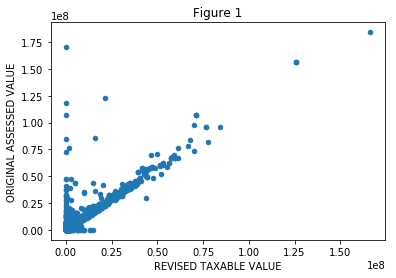

In [30]:
dhs_2c.plot(x='REVISED TAXABLE VALUE', y='ORIGINAL ASSESSED VALUE', kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)
plt.title('Figure 1', loc='center')


Figure 1: Revised Taxable vs Original Assessed Value